# <center> Раздел 2. Модуль 5. Визуализация данных

## <center> **Обзор типов диаграмм**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

### <center> 1. Линейный график

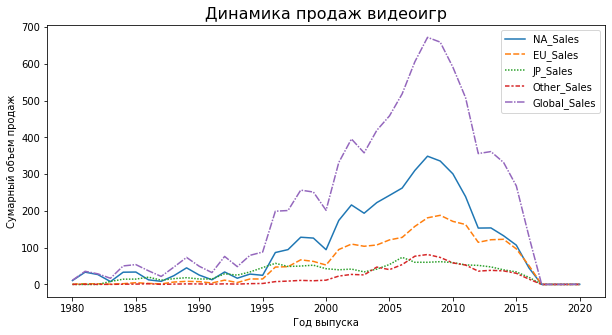

In [ ]:
vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Сумарный объем продаж');

Представляет собой последовательность точек, соединенных линией. Каждая точка - это пара координат x и y, которые отображены по осям абсцисс и ординат (в двумерном случае). 

На практике в Data Science такие графики чаще всего используются для визуализации временных рядов, например, чтобы отследить динамику продаж во времени, число активных пользователей по дням, изменение курса валют и акций. 
График особенно бывает полезен, когда вы пытаетесь спрогнозировать ряд и вам необходимо увидеть свой прогноз на графике и сравнить его с действительностью.


### <center> 2. Гистограмма

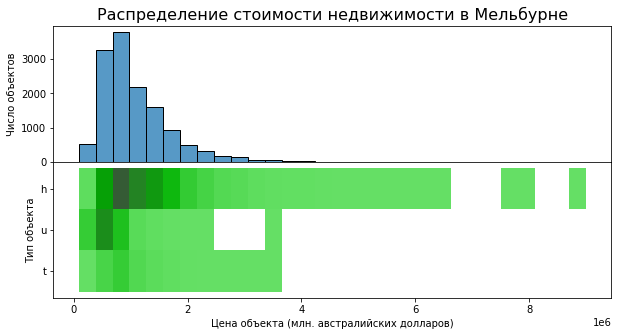

In [ ]:
melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта');

Гистограмма - это способ визуализации частоты попадания признака в некоторый численный интервал. Гистограмма состоит из прямоугольников, расположенных вдоль оси x. Ось разбита на интервалы, их еще называют корзинами (bins), их число задается пользователем. Ширина интервалов одинакова и задает ширину прямоугольника. По оси y откладывается высота прямоугольника - количество наблюдений, которые попали в интервал, чем выше столбик, тем больше наблюдений находятся в интервале.

Гистограммы часто используются для оценки распределения числового признака, например, мы можем понять как распределены цены на товары, число шагов, которые делает пользователь умных часов, масса метеоритов, падающих на землю.

### <center> 3. Диаграмма рассеяния

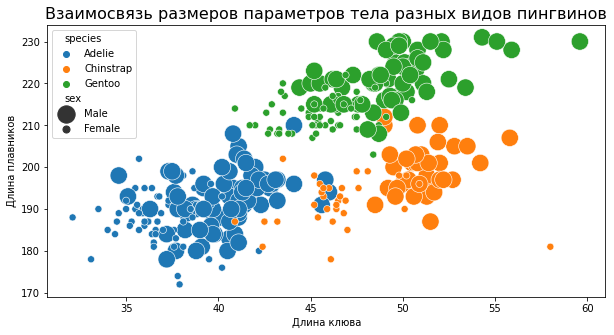

In [ ]:
penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина плавников');

График представляет собой облака точек, по оси абсцисс откладывается одна числовая переменная, а по оси ординат - вторая, а каждая точка на графике - это запись из таблицы. 

Диаграммы рассеяния являются стандартным средством визуализации связи между двумя числовыми переменными. Однако, покопавшись в настройках графика, в исследование зависимости можно добавить и несколько категориальных переменных.

Диаграммы рассеяния являются мощным инструментом, который очень широко используется в Data Science. С помощью нее мы можем увидеть как зависит (или не зависит) давление от возраста пациента, объем продаж товаров от количества показанной рекламы и т.д. 
Оценив взаимосвязь признаков, мы можем принять решение, использовать ли какой-то из признаков для предсказания или нет.


### <center> 2.4. Boxplot

Коробчатые диаграммы, которые были введены в употребление Тьюки в 1977 году, являются новым типом диаграмм для исследования распределения числового признака по отношению к предыдущим. Диаграмма основана на понятии квантилей. Приведем общую схему построения диаграммы:


Основные составляющие графика:
1. **Ящик или коробка**. Левая граница коробки соответствует значению Q25, правая - Q75, а линия внутри коробки - медиане. Ширина ящика называется межквартильным размахом (Interquartile range) и вычисляется как IQR = Q75 -Q25. 
2. **Усы ящика**, длина которых равна 1.5 IQR. Крайние точки усов часто обозначаются в литературе как “min” и “max” и называются границами распределения. Фактически эти точки не всегда являются истинными минимумом и максимумом признака.
3. **Потенциальные выбросы** - точки лежащие за пределами границ. Согласно теории Тьюки эти точки следует считать аномалиями и они подлежат исключению из данных. Однако, на практике так бывает не всегда и необходимо проводить дополнительное исследование. Об этом мы будем говорить подробнее в модуле по очистке данных.

<img src= https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/изображение_2021-09-20_112110.png >

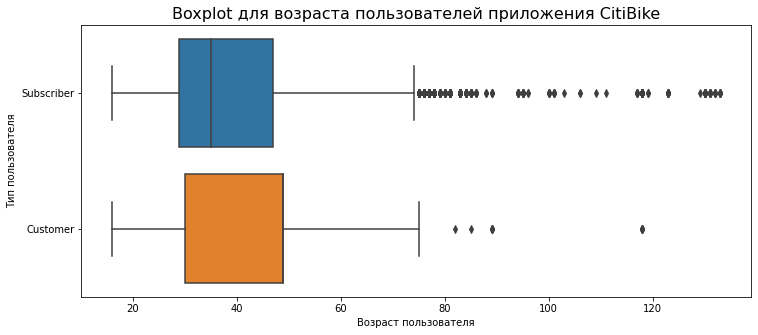

In [ ]:
citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя');

Коробчатые диаграммы часто используются для поиска потенциальных выбросов в данных, а также для сравнения показателей нескольких распределений друг с другом: например, можно визуально сравнить медианные стоимости товаров разных магазинов или размах цен на квартиры в районах Москвы (размеры ящиков). По своей применимости коробчатые диаграммы часто являются более совершенными аналогами гистограмм. 

### <center> 5. Круговая диаграмма

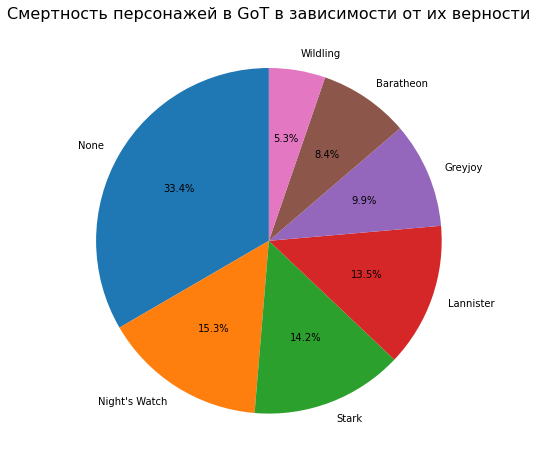

In [ ]:
game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

Диаграмма представляет собой круг, разделенный на сектора. Весь круг составляет 100%. Каждый из секторов отображает долю одной из категорий в данных и размер сектора соответствует части целого от круга. 

Диаграмма является способом визуализации для категориального признака, например, можно визуализировать и сравнивать доли от выручки, которые делает каждый продавец. 

Однако специалисты и эксперты по визуализации обычно сторонятся круговых диаграмм и предпочитают им столбчатые диаграммы. Главная причина - столбчатые диаграммы могут быть более информативными.


### <center> 6. Столбчатая диаграмма

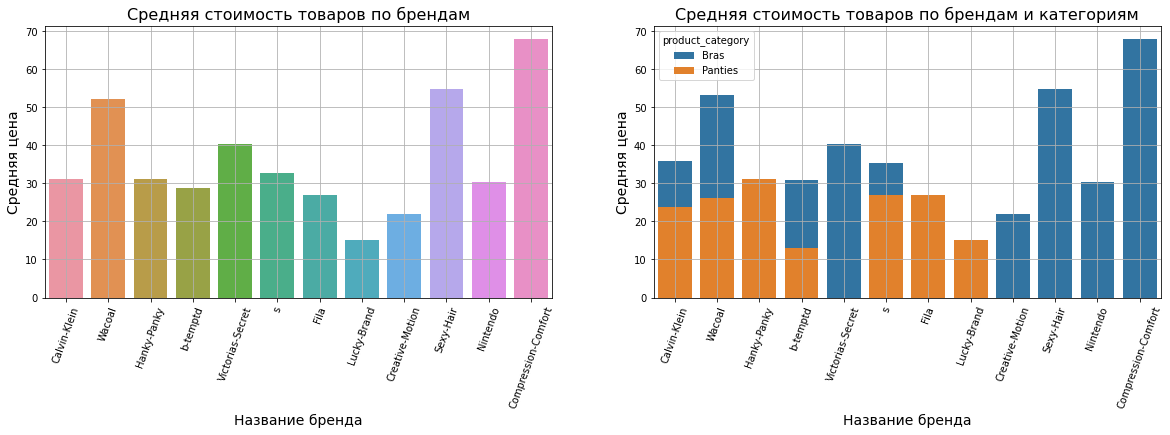

In [ ]:
amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b-temptd'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '', regex=True).astype('float64')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

Столбчатая диаграмма тоже максимально проста: по оси x откладывается некоторый категориальный признак, для каждой категории которого рассчитан некоторый показатель (средняя цена товаров, медианная стоимость нефти, максимальная зафиксированная концентрация газа). Высота столбца и есть значение этого показателя. 

Основное применение столбчатых диаграмм в Data Science - это сравнить категории друг с другом. Например, сравнить рестораны по суммарной прибыли, сравнить средние расходы пользователей, медианную стоимость квартир по районам и т.д. 

Преимущество столбчатых диаграмм над круговыми в том, что в столбчатые диаграммы можно добавлять разделение по другим категориальным признакам и рассматривать совместное распределение показателей, тем самым, повышая информативность. Такие диаграммы называются многоуровневыми.


### <center> 7. Тепловая карта

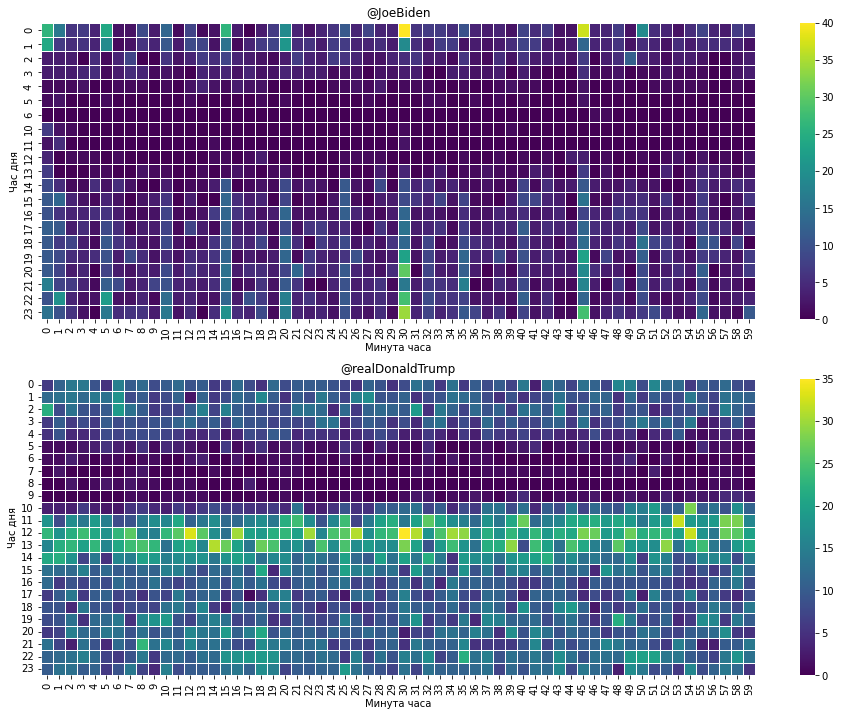

In [ ]:
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

Тепловая карта - это графическое представление некоторой таблицы, где значения в ячейках таблицы выделяются определенным цветом или интенсивностью цвета. Таблицей может быть как DataFrame, так и, например, изображение.

Применение тепловых карты очень различно: от визуализации категорий объектов на изображениях до графического представления матриц. При исследовании табличных данных они чаще всего применяются для визуализации сводных таблиц.
